In [ ]:
%pip install ctef

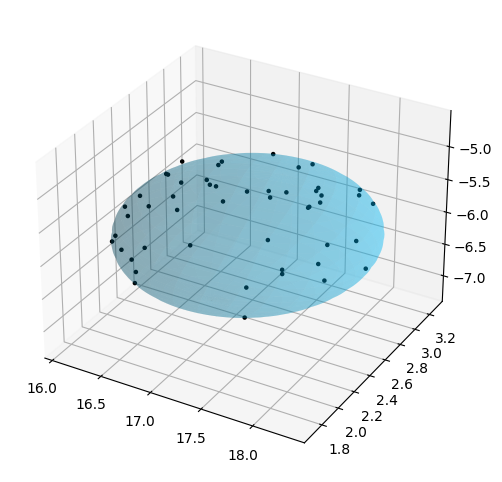

In [28]:
from ctef.ctef import ctef
import matplotlib.pyplot as plt
from examples.helpers import generate_truth, simulate_data
import numpy as np

# parameters
p = 3
tau = 1
axis_ratio = 2
noise_level = .01
n_samples = 50

# generate data
truth = generate_truth(p, tau=tau, axis_ratio=axis_ratio)
X = simulate_data(n_samples, noise_level, truth)

# fit
fit = ctef(X)
Lambda, center = fit['Lambda'], fit['center']

# plot
n_mesh = 100
fig = plt.figure(figsize=(8, 6))

if p == 2:
  ax = fig.add_subplot(1, 1, 1)

  # data
  ax.scatter(X[:,0], X[:,1], color='black', s=5, alpha=1)

  # fit
  theta = np.linspace(0, 2*np.pi, n_mesh)
  x = np.cos(theta)
  y = np.sin(theta)
  for j in range(n_mesh):
      eta = np.array([x[j],y[j]])
      [x[j],y[j]] = center + Lambda @ eta
  ax.plot(x, y, alpha=1, lw=2, color='deepskyblue')

if p == 3:
  ax = fig.add_subplot(1, 1, 1, projection='3d')

  # data
  ax.scatter(X[:,0], X[:,1], X[:,2], color='black', s=5, alpha=1)

  # fit
  phi = np.linspace(0, 2*np.pi, n_mesh)
  theta = np.linspace(0, np.pi, n_mesh)
  x = np.outer(np.cos(phi), np.sin(theta))
  y = np.outer(np.sin(phi), np.sin(theta))
  z = np.outer(np.ones_like(phi), np.cos(theta))
  for ii in range(n_mesh):
    for jj in range(n_mesh):
      eta = np.array([x[ii,jj],y[ii,jj],z[ii,jj]])
      [x[ii,jj],y[ii,jj],z[ii,jj]] = center + Lambda @ eta
  ax.plot_surface(x, y, z,  rstride=4, cstride=4, alpha=.25, color='deepskyblue')

# plt.tight_layout()
plt.show()